# <center>Aug 14, 2022</center>

<h3>DataSet</h3>
<a href="https://community.data.gov.in/production-of-automobiles-and-resultant-pollution/"> Go to Information About DataSet Page.</a>

Automobile industry is one of the largest industries in India. It is one of the key drivers of the Indian economy. Automobile Production is undertaken in India at a large scale. Different types of vehicles are manufactured in India. The major categories of automobile production are: 

Passenger Vehicles (PVs), which is bifurcated into two segments viz. Passenger Cars and Multi-Utility Vehicles; 

Commercial Vehicles (CVs), bifurcated into two segments i.e. Medium & Heavy Commercial Vehicles (M & HCVs) and 

Light Commercial Vehicles (LCVs); Three Wheelers and Two Wheelers.

In [1]:
#import Necessary Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import requests #to take data from url.

Dataset is uploaded on GitHub. So, read data from url using "pandas".

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/Shayankr/Hackathon/master/IITG_Hackathon/Table-20.6-All_India_SYB2016_1.csv")

In [3]:
#Check shape of data
data.shape

(19, 16)

In [4]:
#column names of data
data.columns

Index(['Category', 'Segment', '2001-02', '2002-03', '2003-04', '2004-05',
       '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-2011',
       '2011-12', '2012-13', '2013-14', '2014-15'],
      dtype='object')

In [5]:
#see random 2 rows of data
data.sample(2)

,Category,Segment,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-2011,2011-12,2012-13,2013-14,2014-15
10,Three Wheelers,Passenger Carriers,170013.0,210454.0,245084.0,237413.0,286987.0,385443,371060,417434,530203,698811.0,768687.0,740689.0,733244.0,845606.0
5,Commercial Vehicles - M & HCVs,Total M & HCVs,96752.0,120502.0,166123.0,214807.0,219295.0,294266,294957,192283,250171,344542.0,384801.0,278560.0,221556.0,268553.0


#### Pre-processing of Dataset

#Check NULL values, if any do proper operation.

In [6]:
data.isnull().sum()

Category     0
Segment      0
2001-02      1
2002-03      1
2003-04      1
2004-05      1
2005-06      1
2006-07      0
2007-08      0
2008-09      0
2009-10      0
2010-2011    1
2011-12      1
2012-13      1
2013-14      1
2014-15      1
dtype: int64

#Check the frequency of null values --row wise.

In [7]:
isna_index = [data.iloc[i,:].isna().sum() for i in range(data.shape[0]-1)]
print(isna_index)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0]


Only one row has significant amount number of null columns. So, Let's remove that rows.

In [8]:
df = data.dropna(axis=0)

In [9]:
print(df.isna().sum())

Category     0
Segment      0
2001-02      0
2002-03      0
2003-04      0
2004-05      0
2005-06      0
2006-07      0
2007-08      0
2008-09      0
2009-10      0
2010-2011    0
2011-12      0
2012-13      0
2013-14      0
2014-15      0
dtype: int64


In [10]:
#Now, shape of dataset is:
df.shape

(18, 16)

Check Outliers if any:

To check outliers, the best plot is either "BoxPlot" or "VoilinPlot". Sometimes, scatter plot is also used.

Outliers may be removed by using standard deviation method. But, here is no need for such a small dataset.

#### Analyze dataset, to use visualization(Graphs). According to the data-types of attributes/features, different plots are used.

In [11]:
df

,Category,Segment,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-2011,2011-12,2012-13,2013-14,2014-15
0,Passenger Vehicles (PVs),Passenger Cars,500301.0,557410.0,782562.0,960487.0,1046133.0,1238032,1426212,1516967,1932620,2453113.0,2775124.0,2668633.0,2519281.0,2590917.0
1,Passenger Vehicles (PVs),Multi-Utility Vehicles,169418.0,165920.0,206998.0,249389.0,263167.0,307202,351371,321626,424791,534183.0,370945.0,564928.0,568692.0,629255.0
2,Passenger Vehicles (PVs),Total Passenger Vehicles (PVs),669719.0,723330.0,989560.0,1209876.0,1309300.0,1545234,1777583,1838593,2357411,2987296.0,3146069.0,3233561.0,3087973.0,3220172.0
3,Commercial Vehicles - M & HCVs,Passenger Carriers,20283.0,21156.0,27628.0,30419.0,28982.0,32828,46542,40995,46026,54552.0,54156.0,50024.0,41175.0,49360.0
4,Commercial Vehicles - M & HCVs,Goods Carriers,76469.0,99346.0,138495.0,184388.0,190313.0,261438,248415,151288,204145,289990.0,330645.0,228536.0,180381.0,219193.0
5,Commercial Vehicles - M & HCVs,Total M & HCVs,96752.0,120502.0,166123.0,214807.0,219295.0,294266,294957,192283,250171,344542.0,384801.0,278560.0,221556.0,268553.0
6,Commercial Vehicles - LCVs,Passenger Carriers,14977.0,19821.0,20962.0,22619.0,25395.0,29443,33882,28635,34751,38008.0,50017.0,51376.0,45136.0,46569.0
7,Commercial Vehicles - LCVs,Goods Carriers,50779.0,63374.0,87955.0,116277.0,146393.0,196291,220167,195952,281686,370185.0,494318.0,501808.0,432343.0,381961.0
8,Commercial Vehicles - LCVs,Total LCVs,65756.0,83195.0,108917.0,138896.0,171788.0,225734,254049,224587,316437,408193.0,544335.0,553184.0,477479.0,428530.0
9,Commercial Vehicles (CVs),Total Commercial Vehicles (CVs),162508.0,203697.0,275040.0,353703.0,391083.0,520000,549006,416870,566608,752735.0,929136.0,831744.0,699035.0,697083.0


Here, last row shows total sum of production of vehicles in each one year of interval.

Passenger Vehicles (PVs), which is bifurcated into two segments viz. Passenger Cars and Multi-Utility Vehicles; 

Commercial Vehicles (CVs), bifurcated into two segments i.e. Medium & Heavy Commercial Vehicles (M & HCVs) and Light Commercial Vehicles (LCVs); 

Three Wheelers and 

Two Wheelers.

Here, groupby() function will be very much useful to analyze data by graph, beacuse of dataset contains both categorical and numerical data.

In [12]:
#Passenger Vehicle data
df_pv = df[df['Category']=='Passenger Vehicles (PVs)']
df_pv

,Category,Segment,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-2011,2011-12,2012-13,2013-14,2014-15
0,Passenger Vehicles (PVs),Passenger Cars,500301.0,557410.0,782562.0,960487.0,1046133.0,1238032,1426212,1516967,1932620,2453113.0,2775124.0,2668633.0,2519281.0,2590917.0
1,Passenger Vehicles (PVs),Multi-Utility Vehicles,169418.0,165920.0,206998.0,249389.0,263167.0,307202,351371,321626,424791,534183.0,370945.0,564928.0,568692.0,629255.0
2,Passenger Vehicles (PVs),Total Passenger Vehicles (PVs),669719.0,723330.0,989560.0,1209876.0,1309300.0,1545234,1777583,1838593,2357411,2987296.0,3146069.0,3233561.0,3087973.0,3220172.0


In [13]:
#Commercial Vehicles (CVs) data
df_cv1 = df[df['Category'] == 'Commercial Vehicles - M & HCVs']
df_cv2 = df[df['Category'] == 'Commercial Vehicles - LCVs']
df_cv3 = df[df['Category'] == 'Commercial Vehicles (CVs)']

In [14]:
pd.merge(pd.merge(df_cv1, df_cv2,how='outer'), df_cv3, how='outer')

,Category,Segment,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-2011,2011-12,2012-13,2013-14,2014-15
0,Commercial Vehicles - M & HCVs,Passenger Carriers,20283.0,21156.0,27628.0,30419.0,28982.0,32828,46542,40995,46026,54552.0,54156.0,50024.0,41175.0,49360.0
1,Commercial Vehicles - M & HCVs,Goods Carriers,76469.0,99346.0,138495.0,184388.0,190313.0,261438,248415,151288,204145,289990.0,330645.0,228536.0,180381.0,219193.0
2,Commercial Vehicles - M & HCVs,Total M & HCVs,96752.0,120502.0,166123.0,214807.0,219295.0,294266,294957,192283,250171,344542.0,384801.0,278560.0,221556.0,268553.0
3,Commercial Vehicles - LCVs,Passenger Carriers,14977.0,19821.0,20962.0,22619.0,25395.0,29443,33882,28635,34751,38008.0,50017.0,51376.0,45136.0,46569.0
4,Commercial Vehicles - LCVs,Goods Carriers,50779.0,63374.0,87955.0,116277.0,146393.0,196291,220167,195952,281686,370185.0,494318.0,501808.0,432343.0,381961.0
5,Commercial Vehicles - LCVs,Total LCVs,65756.0,83195.0,108917.0,138896.0,171788.0,225734,254049,224587,316437,408193.0,544335.0,553184.0,477479.0,428530.0
6,Commercial Vehicles (CVs),Total Commercial Vehicles (CVs),162508.0,203697.0,275040.0,353703.0,391083.0,520000,549006,416870,566608,752735.0,929136.0,831744.0,699035.0,697083.0


In [15]:
df_cv = df.loc[df['Category'].str.contains('Commercial Vehicles')]
df_cv

,Category,Segment,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-2011,2011-12,2012-13,2013-14,2014-15
3,Commercial Vehicles - M & HCVs,Passenger Carriers,20283.0,21156.0,27628.0,30419.0,28982.0,32828,46542,40995,46026,54552.0,54156.0,50024.0,41175.0,49360.0
4,Commercial Vehicles - M & HCVs,Goods Carriers,76469.0,99346.0,138495.0,184388.0,190313.0,261438,248415,151288,204145,289990.0,330645.0,228536.0,180381.0,219193.0
5,Commercial Vehicles - M & HCVs,Total M & HCVs,96752.0,120502.0,166123.0,214807.0,219295.0,294266,294957,192283,250171,344542.0,384801.0,278560.0,221556.0,268553.0
6,Commercial Vehicles - LCVs,Passenger Carriers,14977.0,19821.0,20962.0,22619.0,25395.0,29443,33882,28635,34751,38008.0,50017.0,51376.0,45136.0,46569.0
7,Commercial Vehicles - LCVs,Goods Carriers,50779.0,63374.0,87955.0,116277.0,146393.0,196291,220167,195952,281686,370185.0,494318.0,501808.0,432343.0,381961.0
8,Commercial Vehicles - LCVs,Total LCVs,65756.0,83195.0,108917.0,138896.0,171788.0,225734,254049,224587,316437,408193.0,544335.0,553184.0,477479.0,428530.0
9,Commercial Vehicles (CVs),Total Commercial Vehicles (CVs),162508.0,203697.0,275040.0,353703.0,391083.0,520000,549006,416870,566608,752735.0,929136.0,831744.0,699035.0,697083.0


In [16]:
#Three Wheelers data
df_3w = df[df['Category']=='Three Wheelers']
df_3w

,Category,Segment,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-2011,2011-12,2012-13,2013-14,2014-15
10,Three Wheelers,Passenger Carriers,170013.0,210454.0,245084.0,237413.0,286987.0,385443,371060,417434,530203,698811.0,768687.0,740689.0,733244.0,845606.0
11,Three Wheelers,Goods Carriers,42735.0,66265.0,111139.0,137032.0,147436.0,170681,129600,79586,88890,100742.0,110602.0,99053.0,96864.0,103415.0
12,Three Wheelers,Total Three Wheelers,212748.0,276719.0,356223.0,374445.0,434423.0,556124,500660,497020,619093,799553.0,879289.0,839742.0,830108.0,949021.0


In [17]:
#Two Wheelers data
df_2w = df[df['Category']=='Two Wheelers']
df_2w

,Category,Segment,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-2011,2011-12,2012-13,2013-14,2014-15
13,Two Wheelers,Scooter/Scooterettee,937506.0,848434.0,935279.0,987498.0,1021013.0,943974,1074933,1161276,1494409,2144765.0,2659340.0,3025014.0,3676213.0,4721415.0
14,Two Wheelers,Motorcycles/Step-Throughs,2906323.0,3876175.0,4355168.0,5193894.0,6207690.0,7112225,6503532,6798118,8444857,10527111.0,11982669.0,11904212.0,12474626.0,13023210.0
15,Two Wheelers,Mopeds,427498.0,351612.0,332294.0,348437.0,379994.0,379987,430827,436219,571070,704575.0,785523.0,791954.0,732210.0,755345.0
17,Two Wheelers,Total Two Wheelers,4271327.0,5076221.0,5622741.0,6529829.0,7608697.0,8466640,8026681,8419792,10512903,13376451.0,15427532.0,15721180.0,16883049.0,18499970.0


Now, the given dataset is well prepared, and plots are easily implememnted on this partioned and whole dataset, to know visual information.

Now, At first see total vehivle production in each year.

In [18]:
df_total = pd.DataFrame(df.loc[18][2:],)
df_total.columns=["Total_Vehicle_Production"]

In [19]:
#see first two rows
df_total.head(2)

,Total_Vehicle_Production
2001-02,5316302.0
2002-03,6279967.0


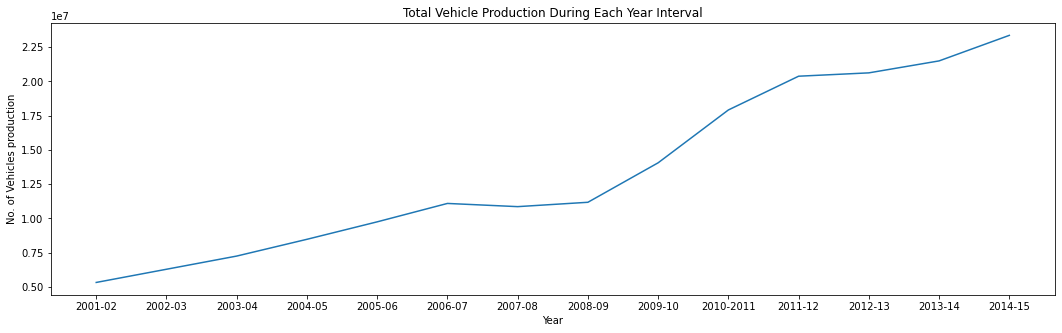

In [20]:
#plotting the production of total vehicles in sub-sequent year.
plt.figure(figsize=(18,5))
plt.plot(df_total.index,df_total.iloc[:,:])
plt.xlabel("Year")
plt.ylabel("No. of Vehicles production")
plt.title("Total Vehicle Production During Each Year Interval")
plt.show()

We can analyze from above line curve that "production of vehicles gonna to increase in each sub-sequent year".

Bar Plot with provide well information about data also.

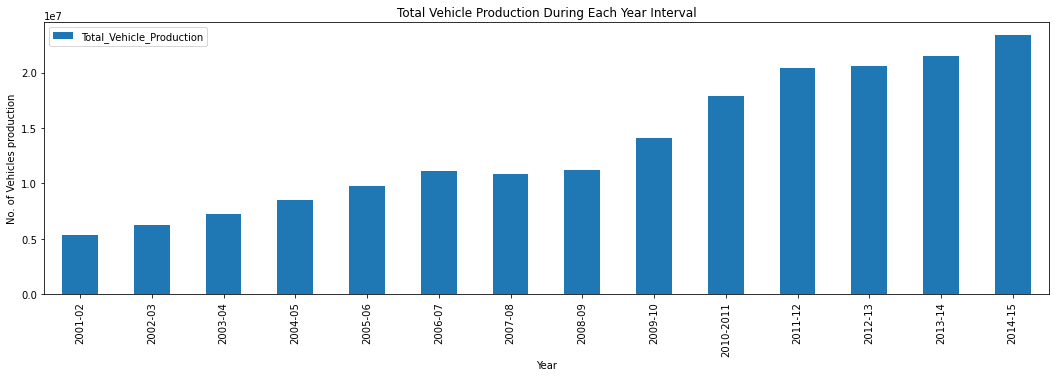

In [21]:
#plotting the production of total vehicles in sub-sequent year.
df_total.plot.bar(figsize=(18,5))
plt.xlabel("Year")
plt.ylabel("No. of Vehicles production")
plt.title("Total Vehicle Production During Each Year Interval")
plt.show()

Now, Analysis about "Two Wheeler" vehicle production:

In [22]:
#Two Wheeler Dataset
df_2w = df_2w.set_index('Category',drop=True)
df_2w

,Segment,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-2011,2011-12,2012-13,2013-14,2014-15
Category,,,,,,,,,,,,,,,
Two Wheelers,Scooter/Scooterettee,937506.0,848434.0,935279.0,987498.0,1021013.0,943974,1074933,1161276,1494409,2144765.0,2659340.0,3025014.0,3676213.0,4721415.0
Two Wheelers,Motorcycles/Step-Throughs,2906323.0,3876175.0,4355168.0,5193894.0,6207690.0,7112225,6503532,6798118,8444857,10527111.0,11982669.0,11904212.0,12474626.0,13023210.0
Two Wheelers,Mopeds,427498.0,351612.0,332294.0,348437.0,379994.0,379987,430827,436219,571070,704575.0,785523.0,791954.0,732210.0,755345.0
Two Wheelers,Total Two Wheelers,4271327.0,5076221.0,5622741.0,6529829.0,7608697.0,8466640,8026681,8419792,10512903,13376451.0,15427532.0,15721180.0,16883049.0,18499970.0


In [23]:
#Total production of Two Wheelers
df_2w_total = pd.DataFrame(df_2w[df_2w['Segment']=="Total Two Wheelers"].iloc[:,1:])
df_2w_total.set_axis(['Total Two Wheelers'], inplace=True)
df_2w_total

,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-2011,2011-12,2012-13,2013-14,2014-15
Total Two Wheelers,4271327.0,5076221.0,5622741.0,6529829.0,7608697.0,8466640,8026681,8419792,10512903,13376451.0,15427532.0,15721180.0,16883049.0,18499970.0


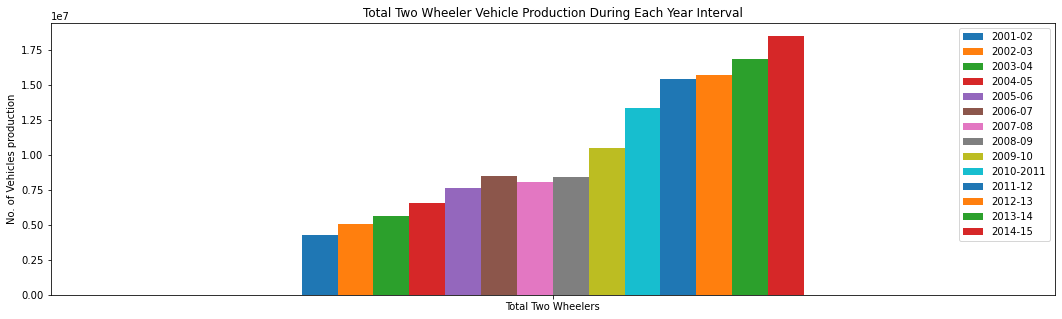

In [24]:
df_2w_total.plot.bar(figsize=(18,5))
plt.xticks(rotation=0)
plt.ylabel("No. of Vehicles production")
plt.title("Total Two Wheeler Vehicle Production During Each Year Interval")
plt.show()

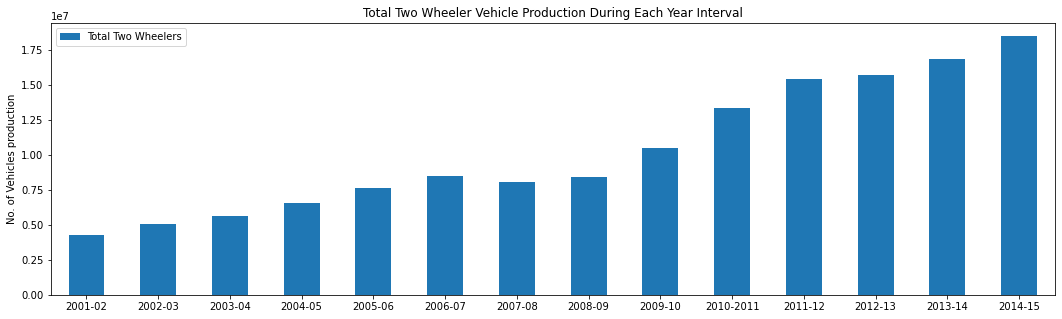

In [25]:
df_2w_total.T.plot.bar(figsize=(18,5))
plt.xticks(rotation=0)
plt.ylabel("No. of Vehicles production")
plt.title("Total Two Wheeler Vehicle Production During Each Year Interval")
plt.show()

Now, Set index to "Segment", which describes different type of two wheelers and total two wheelers.

In [26]:
df_2w_=df_2w.set_index('Segment',drop=True)

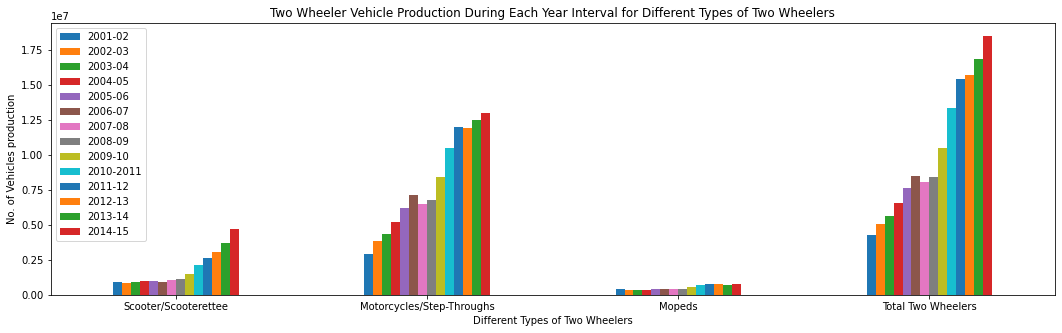

In [27]:
df_2w_.plot.bar(figsize=(18,5))
plt.xticks(rotation=0)
plt.xlabel("Different Types of Two Wheelers")
plt.ylabel("No. of Vehicles production")
plt.title("Two Wheeler Vehicle Production During Each Year Interval for Different Types of Two Wheelers")
plt.show()

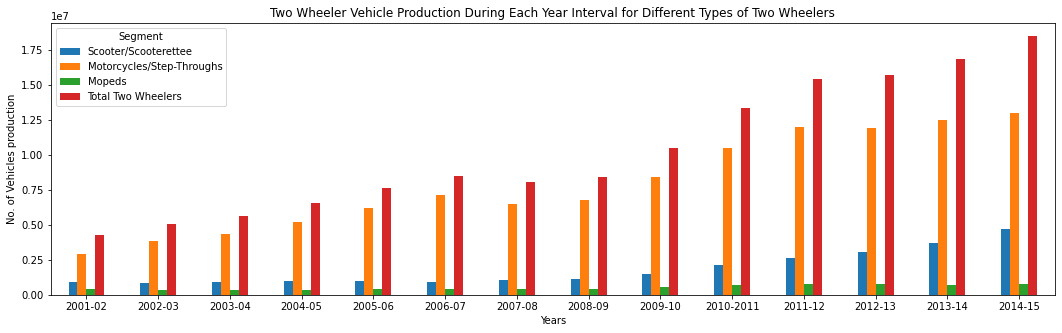

In [28]:
df_2w_.T.plot.bar(figsize=(18,5))
plt.xticks(rotation=0)
plt.xlabel("Years")
plt.ylabel("No. of Vehicles production")
plt.title("Two Wheeler Vehicle Production During Each Year Interval for Different Types of Two Wheelers")
plt.show()

Now, Analysis about "Three Wheeler" vehicle production:

In [29]:
df_3w = df_3w.set_index('Category',drop=True)
#df_3w_.set_index('Segment',drop=True,inplace=True)
df_3w

,Segment,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-2011,2011-12,2012-13,2013-14,2014-15
Category,,,,,,,,,,,,,,,
Three Wheelers,Passenger Carriers,170013.0,210454.0,245084.0,237413.0,286987.0,385443,371060,417434,530203,698811.0,768687.0,740689.0,733244.0,845606.0
Three Wheelers,Goods Carriers,42735.0,66265.0,111139.0,137032.0,147436.0,170681,129600,79586,88890,100742.0,110602.0,99053.0,96864.0,103415.0
Three Wheelers,Total Three Wheelers,212748.0,276719.0,356223.0,374445.0,434423.0,556124,500660,497020,619093,799553.0,879289.0,839742.0,830108.0,949021.0


In [30]:
#Total production of Three Wheelers
df_3w_total = pd.DataFrame(df_3w[df_3w['Segment']=="Total Three Wheelers"].iloc[:,1:])
df_3w_total.set_axis(['Total Three Wheelers'], inplace=True)
df_3w_total

,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-2011,2011-12,2012-13,2013-14,2014-15
Total Three Wheelers,212748.0,276719.0,356223.0,374445.0,434423.0,556124,500660,497020,619093,799553.0,879289.0,839742.0,830108.0,949021.0


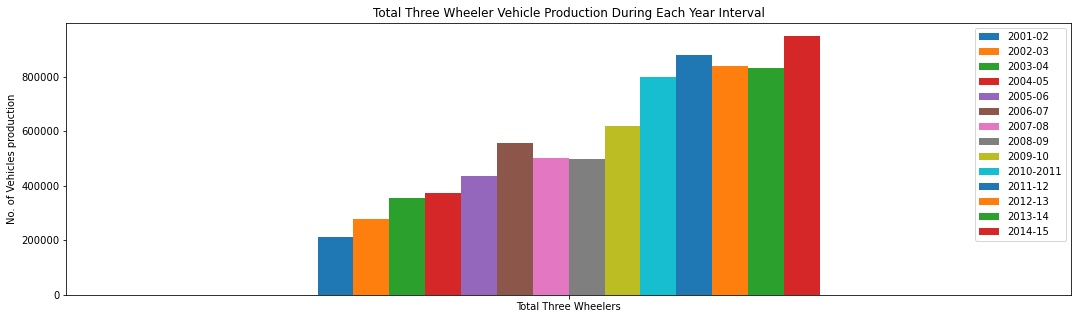

In [31]:
df_3w_total.plot.bar(figsize=(18,5))
plt.xticks(rotation=0)
plt.ylabel("No. of Vehicles production")
plt.title("Total Three Wheeler Vehicle Production During Each Year Interval")
plt.show()

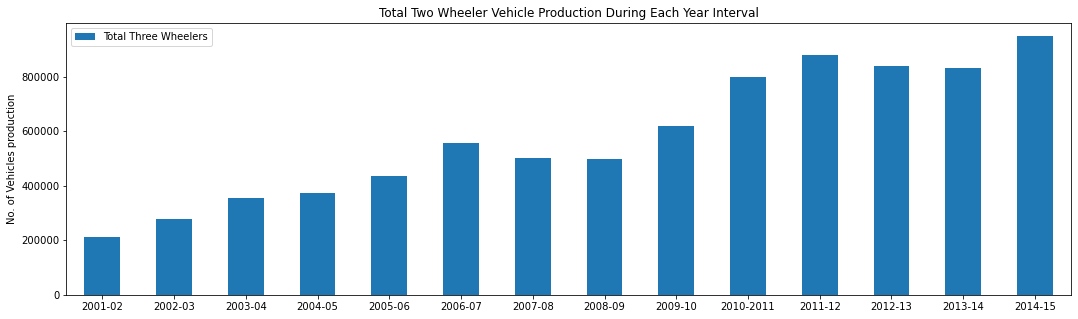

In [32]:
df_3w_total.T.plot.bar(figsize=(18,5))
plt.xticks(rotation=0)
plt.ylabel("No. of Vehicles production")
plt.title("Total Two Wheeler Vehicle Production During Each Year Interval")
plt.show()

Now, Set index to "Segment", which describes different type of two wheelers and total two wheelers.

In [33]:
df_3w_=df_3w.set_index('Segment',drop=True)

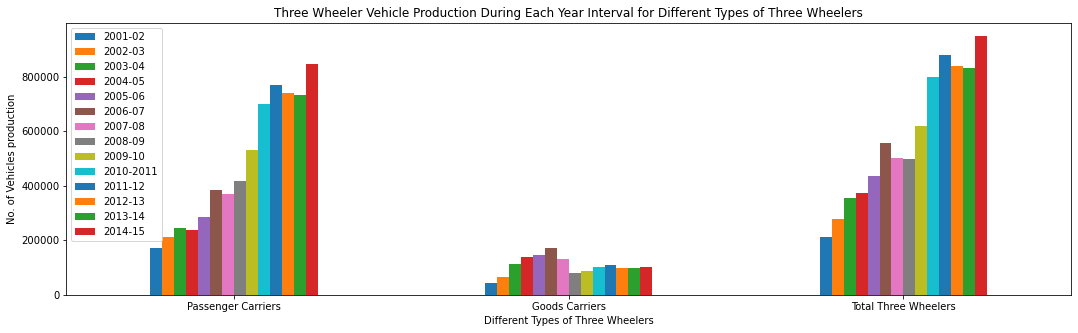

In [34]:
df_3w_.plot.bar(figsize=(18,5))
plt.xticks(rotation=0)
plt.xlabel("Different Types of Three Wheelers")
plt.ylabel("No. of Vehicles production")
plt.title("Three Wheeler Vehicle Production During Each Year Interval for Different Types of Three Wheelers")
plt.show()

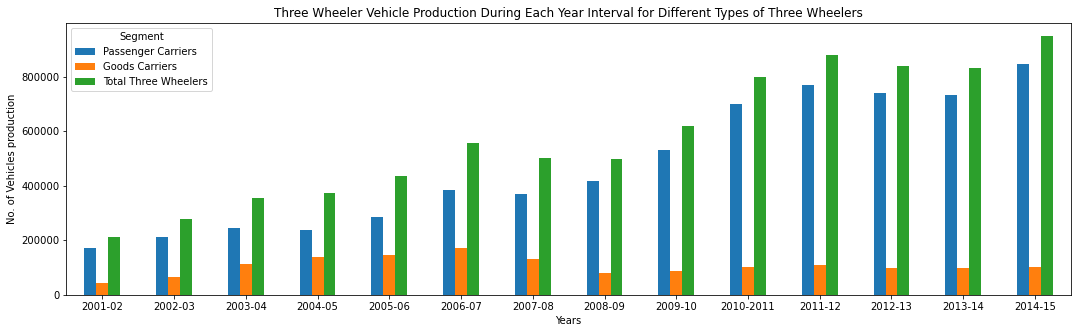

In [35]:
df_3w_.T.plot.bar(figsize=(18,5))
plt.xticks(rotation=0)
plt.xlabel("Years")
plt.ylabel("No. of Vehicles production")
plt.title("Three Wheeler Vehicle Production During Each Year Interval for Different Types of Three Wheelers")
plt.show()

Now, Analysis about "Passenger Vehicles(PVs)" production:

In [36]:
df_pv

,Category,Segment,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-2011,2011-12,2012-13,2013-14,2014-15
0,Passenger Vehicles (PVs),Passenger Cars,500301.0,557410.0,782562.0,960487.0,1046133.0,1238032,1426212,1516967,1932620,2453113.0,2775124.0,2668633.0,2519281.0,2590917.0
1,Passenger Vehicles (PVs),Multi-Utility Vehicles,169418.0,165920.0,206998.0,249389.0,263167.0,307202,351371,321626,424791,534183.0,370945.0,564928.0,568692.0,629255.0
2,Passenger Vehicles (PVs),Total Passenger Vehicles (PVs),669719.0,723330.0,989560.0,1209876.0,1309300.0,1545234,1777583,1838593,2357411,2987296.0,3146069.0,3233561.0,3087973.0,3220172.0


In [37]:
df_pv = df_pv.set_index('Category',drop=True)
df_pv

,Segment,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-2011,2011-12,2012-13,2013-14,2014-15
Category,,,,,,,,,,,,,,,
Passenger Vehicles (PVs),Passenger Cars,500301.0,557410.0,782562.0,960487.0,1046133.0,1238032,1426212,1516967,1932620,2453113.0,2775124.0,2668633.0,2519281.0,2590917.0
Passenger Vehicles (PVs),Multi-Utility Vehicles,169418.0,165920.0,206998.0,249389.0,263167.0,307202,351371,321626,424791,534183.0,370945.0,564928.0,568692.0,629255.0
Passenger Vehicles (PVs),Total Passenger Vehicles (PVs),669719.0,723330.0,989560.0,1209876.0,1309300.0,1545234,1777583,1838593,2357411,2987296.0,3146069.0,3233561.0,3087973.0,3220172.0


In [38]:
#Total production of Three Wheelers
df_pv_total = pd.DataFrame(df_pv[df_pv['Segment']=="Total Passenger Vehicles (PVs)"].iloc[:,1:])
df_pv_total.set_axis(['Total Passenger Vehicles'], inplace=True)
df_pv_total

,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-2011,2011-12,2012-13,2013-14,2014-15
Total Passenger Vehicles,669719.0,723330.0,989560.0,1209876.0,1309300.0,1545234,1777583,1838593,2357411,2987296.0,3146069.0,3233561.0,3087973.0,3220172.0


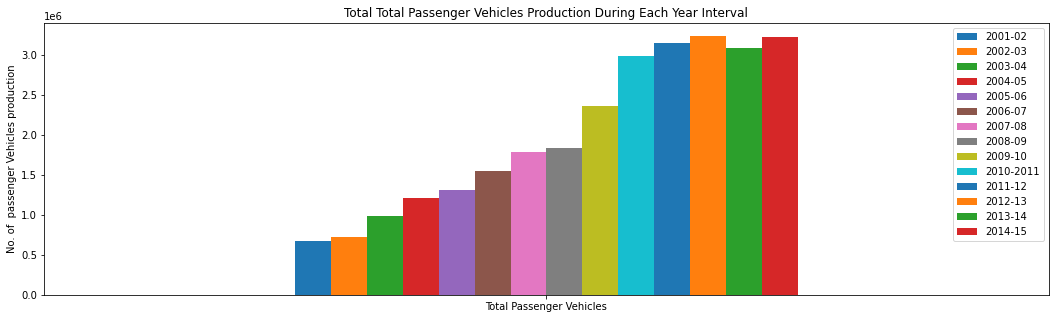

In [39]:
df_pv_total.plot.bar(figsize=(18,5))
plt.xticks(rotation=0)
plt.ylabel("No. of  passenger Vehicles production")
plt.title("Total Total Passenger Vehicles Production During Each Year Interval")
plt.show()

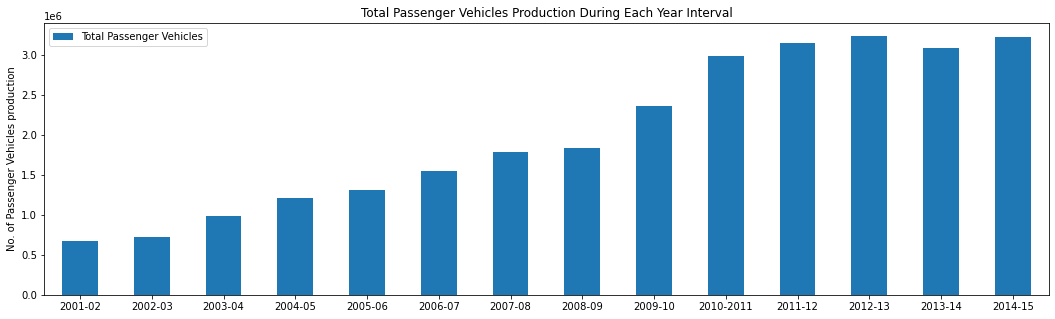

In [40]:
df_pv_total.T.plot.bar(figsize=(18,5))
plt.xticks(rotation=0)
plt.ylabel("No. of Passenger Vehicles production")
plt.title("Total Passenger Vehicles Production During Each Year Interval")
plt.show()

Now, Set index to "Segment", which describes different type of and total Passenger Vehicles.

In [41]:
df_pv_=df_pv.set_index('Segment',drop=True)

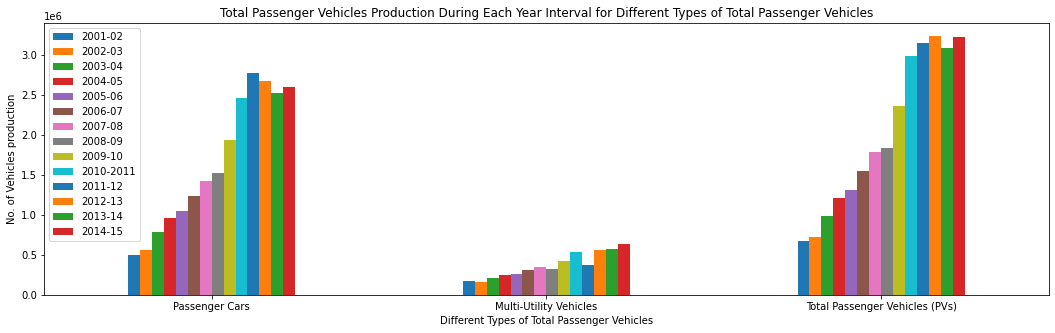

In [42]:
df_pv_.plot.bar(figsize=(18,5))
plt.xticks(rotation=0)
plt.xlabel("Different Types of Total Passenger Vehicles")
plt.ylabel("No. of Vehicles production")
plt.title("Total Passenger Vehicles Production During Each Year Interval for Different Types of Total Passenger Vehicles")
plt.show()

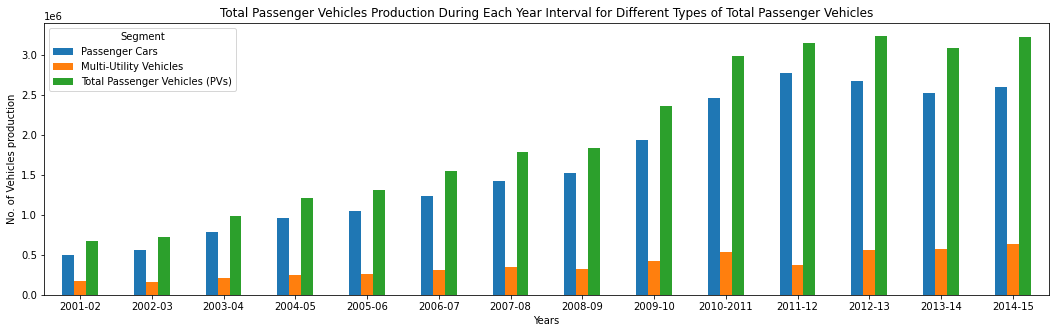

In [43]:
df_pv_.T.plot.bar(figsize=(18,5))
plt.xticks(rotation=0)
plt.xlabel("Years")
plt.ylabel("No. of Vehicles production")
plt.title("Total Passenger Vehicles Production During Each Year Interval for Different Types of Total Passenger Vehicles")
plt.show()

Finally, Pie Chart is used to show year wise production of different types of vehicles.

Total vehicles(All types)

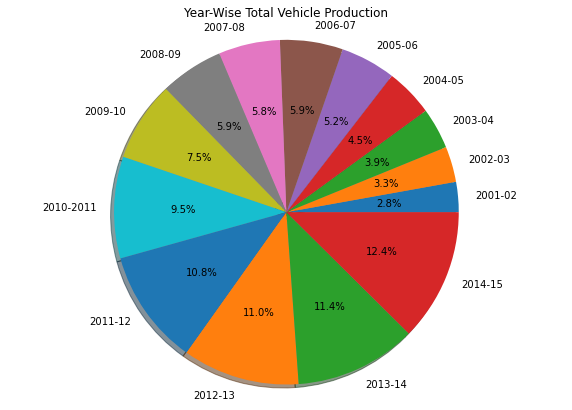

In [44]:
# Creating plot
plt.figure(figsize =(10, 7))
plt.pie(df_total['Total_Vehicle_Production'], labels = df_total.index, autopct='%1.1f%%', shadow=True,)
plt.title("Year-Wise Total Vehicle Production")
plt.axis('equal')
# show plot
plt.show()

Total Passenger Vehicles

In [45]:
df_pv_total = pd.DataFrame(df_pv.iloc[2][1:],)
df_pv_total.columns=["Total_Passenger_Vehicle_Production"]

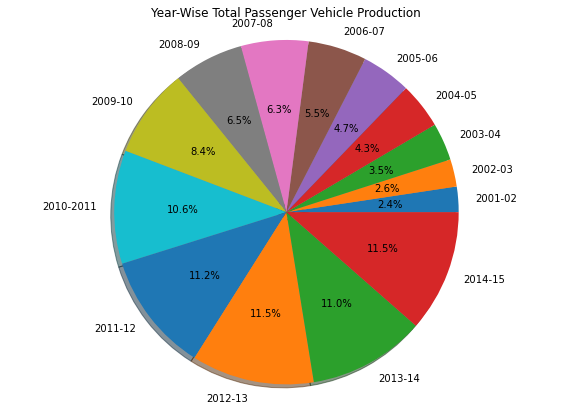

In [46]:
# Creating plot
plt.figure(figsize =(10, 7))
plt.pie(df_pv_total['Total_Passenger_Vehicle_Production'], labels = df_pv_total.index, autopct='%1.1f%%', shadow=True,)
plt.title("Year-Wise Total Passenger Vehicle Production")
plt.axis('equal')
# show plot
plt.show()

Commercial Vehicles

In [47]:
df_cv_total = pd.DataFrame(df_cv.loc[9][2:],)
df_cv_total.columns=["Total_Commercial_Vehicle_Production"]

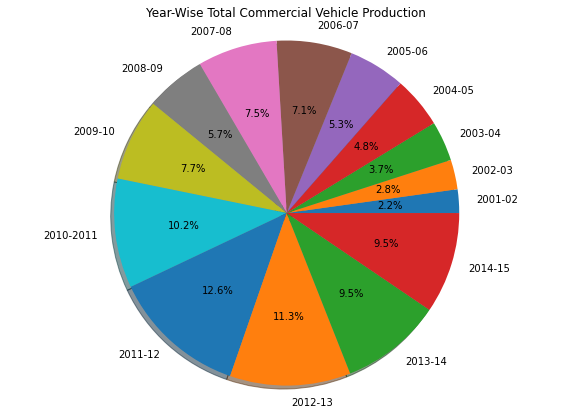

In [48]:
# Creating plot
plt.figure(figsize =(10, 7))
plt.pie(df_cv_total['Total_Commercial_Vehicle_Production'], labels = df_cv_total.index, autopct='%1.1f%%', shadow=True,)
plt.title("Year-Wise Total Commercial Vehicle Production")
plt.axis('equal')
# show plot
plt.show()

Two Wheelers

In [49]:
df_2w_total = pd.DataFrame(df_2w.iloc[3][1:],)
df_2w_total.columns=["Total_Two_Wheelers"]

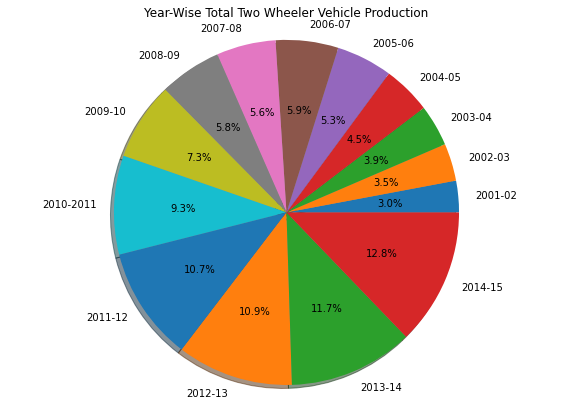

In [50]:
# Creating plot
plt.figure(figsize =(10, 7))
plt.pie(df_2w_total['Total_Two_Wheelers'], labels = df_2w_total.index, autopct='%1.1f%%', shadow=True,)
plt.title("Year-Wise Total Two Wheeler Vehicle Production")
plt.axis('equal')
# show plot
plt.show()

Three Wheelers

In [51]:
df_3w_total = pd.DataFrame(df_3w.iloc[2][1:],)
df_3w_total.columns=["Total_Three_Wheelers"]

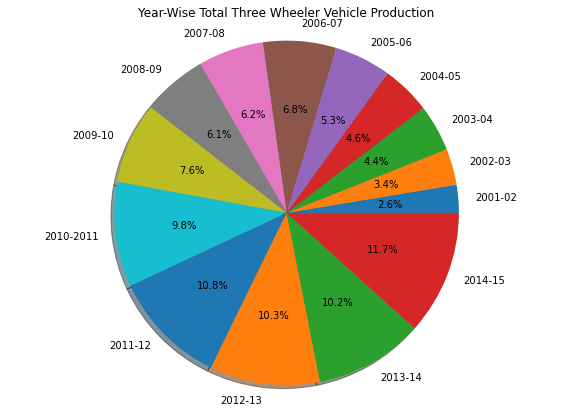

In [52]:
# Creating plot
plt.figure(figsize =(10, 7))
plt.pie(df_3w_total['Total_Three_Wheelers'], labels = df_3w_total.index, autopct='%1.1f%%', shadow=True,)
plt.title("Year-Wise Total Three Wheeler Vehicle Production")
plt.axis('equal')
# show plot
plt.show()

## <center>END of Project